22309434 nikwe t

In [ ]:
import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load and shoe 5 column in the dataset

In [8]:
df=pd.read_csv('/content/SouthAfricaCrimeStats_v2.csv')
df.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


In [ ]:
check data information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30861 entries, 0 to 30860
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Province   30861 non-null  object
 1   Station    30861 non-null  object
 2   Category   30861 non-null  object
 3   2005-2006  30861 non-null  int64 
 4   2006-2007  30861 non-null  int64 
 5   2007-2008  30861 non-null  int64 
 6   2008-2009  30861 non-null  int64 
 7   2009-2010  30861 non-null  int64 
 8   2010-2011  30861 non-null  int64 
 9   2011-2012  30861 non-null  int64 
 10  2012-2013  30861 non-null  int64 
 11  2013-2014  30861 non-null  int64 
 12  2014-2015  30861 non-null  int64 
 13  2015-2016  30861 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.3+ MB


describe dataset

In [11]:
df.describe()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
count,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000
mean,70.527753,69.301610,67.154305,68.756165,69.517773,67.766696,68.259616,69.700658,71.416999,71.498202,70.736496
std,205.491698,198.037635,186.760510,187.173860,185.514638,181.865878,183.334468,184.812420,187.635207,185.019046,179.363964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,10.000000,10.000000,11.000000,11.000000,11.000000
75%,49.000000,50.000000,50.000000,52.000000,54.000000,52.000000,53.000000,55.000000,56.000000,57.000000,58.000000
max,6692.000000,6341.000000,6316.000000,6803.000000,6571.000000,6260.000000,6108.000000,6310.000000,6044.000000,5335.000000,5176.000000


checking for null column

In [12]:
df.isnull().sum()

,0
Province,0
Station,0
Category,0
2005-2006,0
2006-2007,0
2007-2008,0
2008-2009,0
2009-2010,0
2010-2011,0
2011-2012,0


 transforming the data into a long format

In [13]:
df_long = df.melt(id_vars=['Province', 'Station', 'Category'], var_name='Year', value_name='Crime_Count')
df_long['Year'] = df_long['Year'].str.split('-').str[0].astype(int)
display(df_long.head())

,Province,Station,Category,Year,Crime_Count
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,2005,6692
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,2005,6093
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,2005,5341
3,Free State,Park Road,All theft not mentioned elsewhere,2005,5108
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,2005,5099


In [14]:
df_agg = df_long.groupby(['Year', 'Category'])['Crime_Count'].sum().reset_index()
display(df_agg.head())

,Year,Category,Crime_Count
0,2005,All theft not mentioned elsewhere,424690
1,2005,Arson,7247
2,2005,Assault with the intent to inflict grievous bo...,225659
3,2005,Attempted murder,20369
4,2005,Bank robbery,59


Line graph

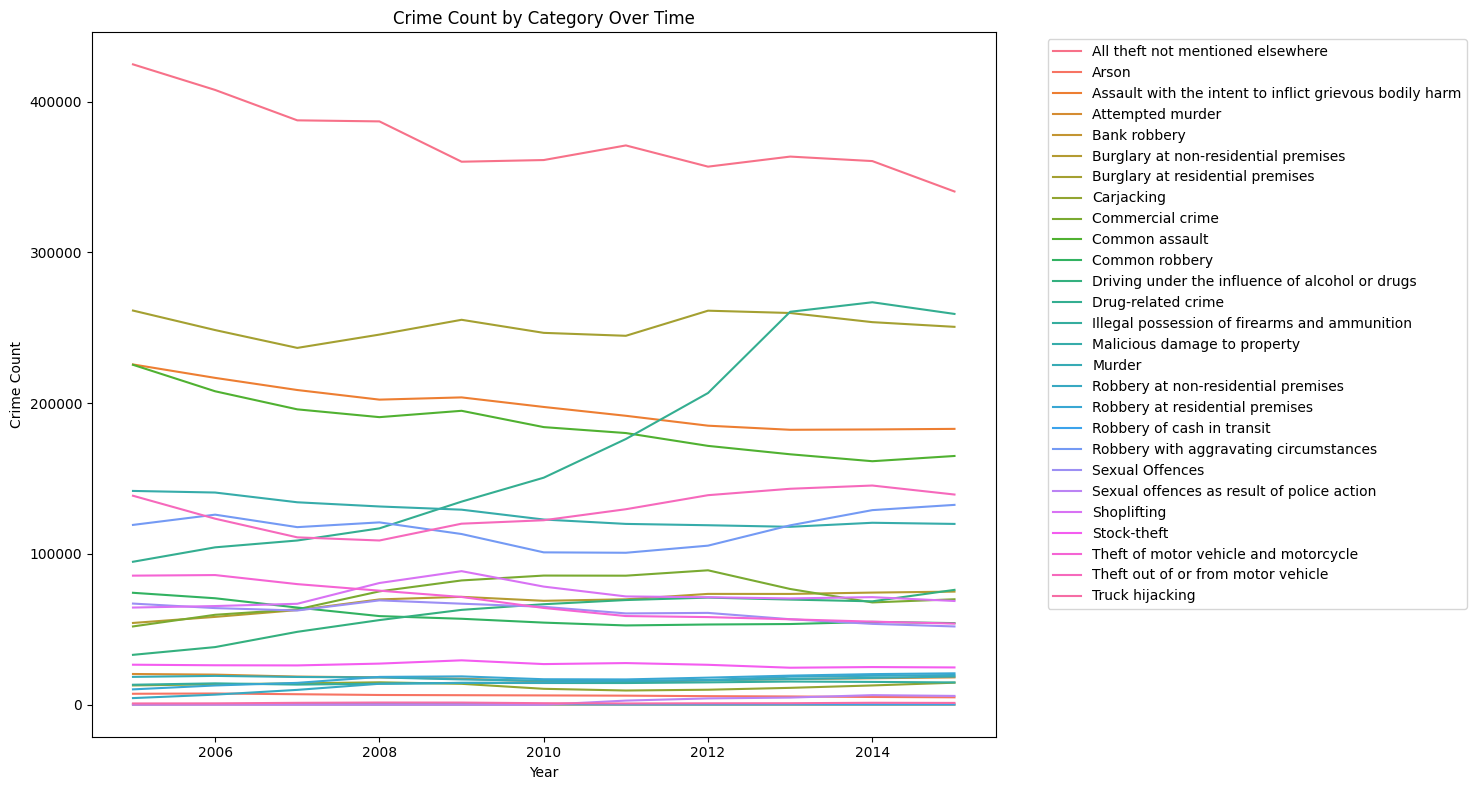

In [15]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_agg, x='Year', y='Crime_Count', hue='Category')
plt.title('Crime Count by Category Over Time')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Calculate the total crime count for each category across all years.


In [16]:
crime_category_totals = df_long.groupby('Category')['Crime_Count'].sum().reset_index()
display(crime_category_totals.head())

,Category,Crime_Count
0,All theft not mentioned elsewhere,4120351
1,Arson,67688
2,Assault with the intent to inflict grievous bo...,2179207
3,Attempted murder,193335
4,Bank robbery,628



Prepare the data for plotting, considering that a pie chart works best with a limited number of categories.


In [17]:
crime_category_totals_sorted = crime_category_totals.sort_values(by='Crime_Count', ascending=False)
top_n = 10
top_categories = crime_category_totals_sorted.head(top_n).copy()
other_crime_count = crime_category_totals_sorted.iloc[top_n:]['Crime_Count'].sum()
other_category_df = pd.DataFrame({'Category': ['Other'], 'Crime_Count': [other_crime_count]})
df_pie_chart = pd.concat([top_categories, other_category_df])
total_crime_count = df_pie_chart['Crime_Count'].sum()
df_pie_chart['Percentage'] = (df_pie_chart['Crime_Count'] / total_crime_count) * 100
display(df_pie_chart)

,Category,Crime_Count,Percentage
0,All theft not mentioned elsewhere,4120351,17.461008
6,Burglary at residential premises,2763950,11.712923
2,Assault with the intent to inflict grievous bo...,2179207,9.234930
9,Common assault,2043267,8.658850
12,Drug-related crime,1879871,7.966419
25,Theft out of or from motor vehicle,1420789,6.020945
14,Malicious damage to property,1397845,5.923715
19,Robbery with aggravating circumstances,1284991,5.445468
8,Commercial crime,807206,3.420735
22,Shoplifting,798079,3.382058



Create a pie chart showing the proportion of each crime category.


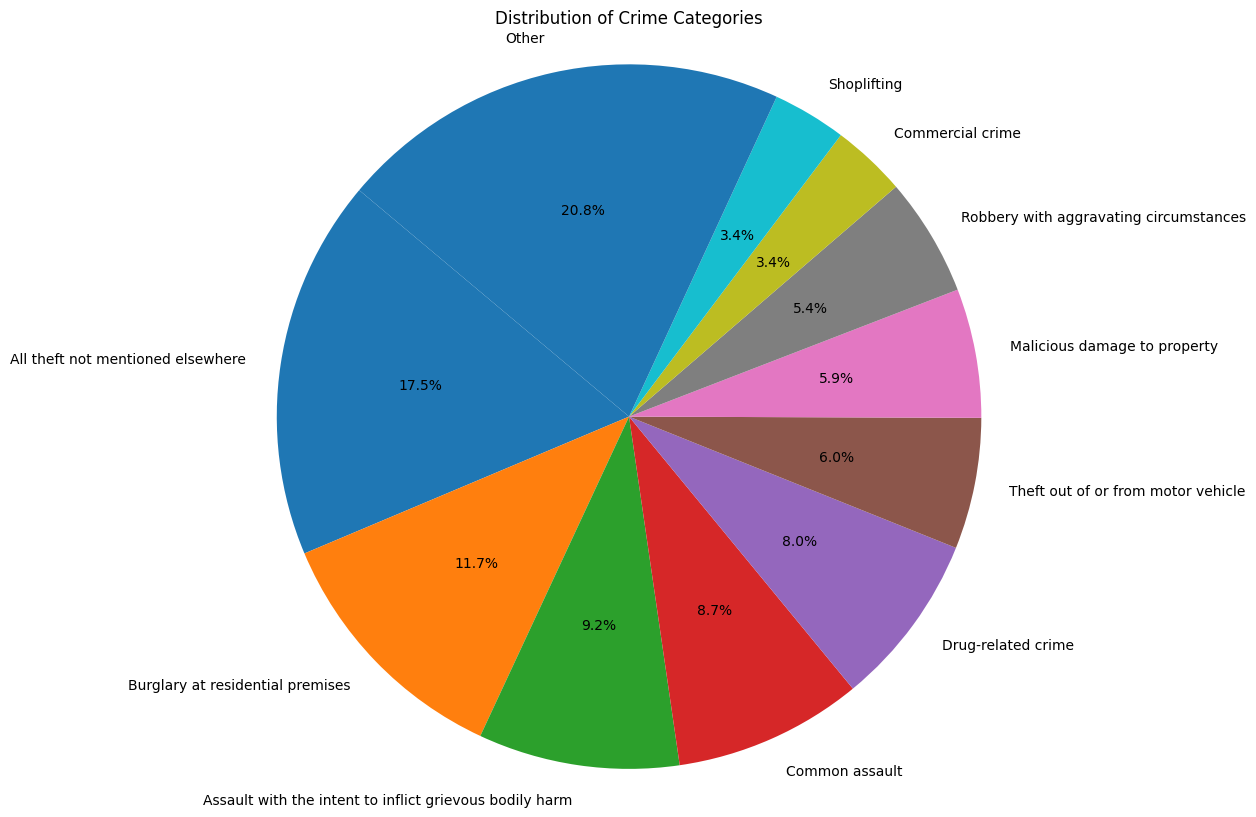

In [18]:
plt.figure(figsize=(10, 10))
plt.pie(df_pie_chart['Crime_Count'], labels=df_pie_chart['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Categories')
plt.axis('equal')
plt.show()


Generate a bar chart using the top crime categories DataFrame to visualize the total crime count for each category.



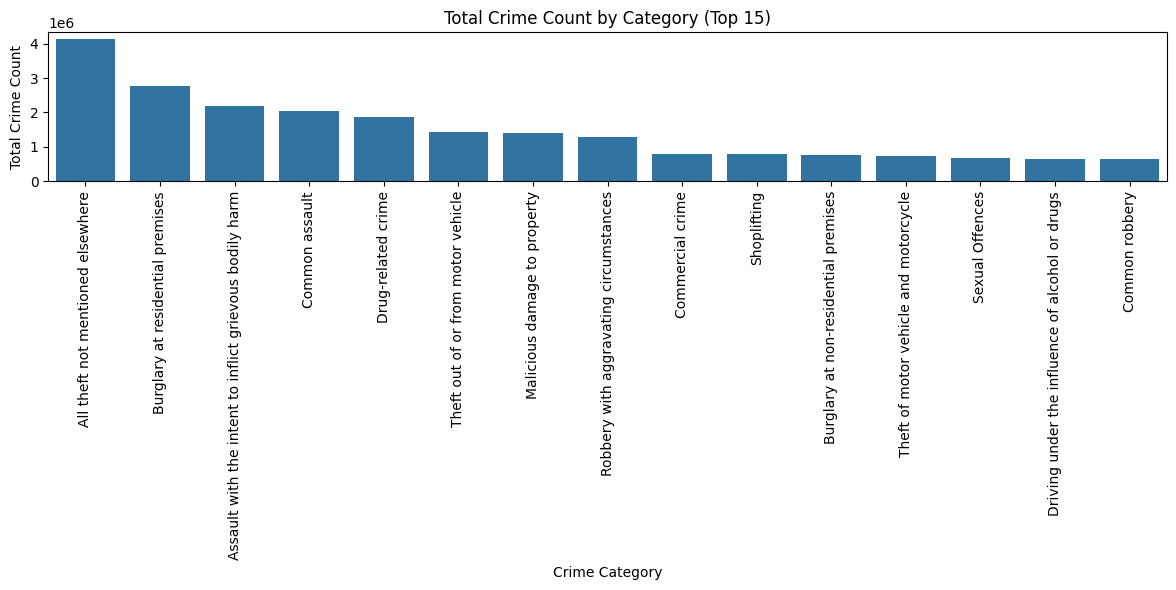

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_crime_categories, x='Category', y='Crime_Count')
plt.title('Total Crime Count by Category (Top 15)')
plt.xlabel('Crime Category')
plt.ylabel('Total Crime Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

heatmap

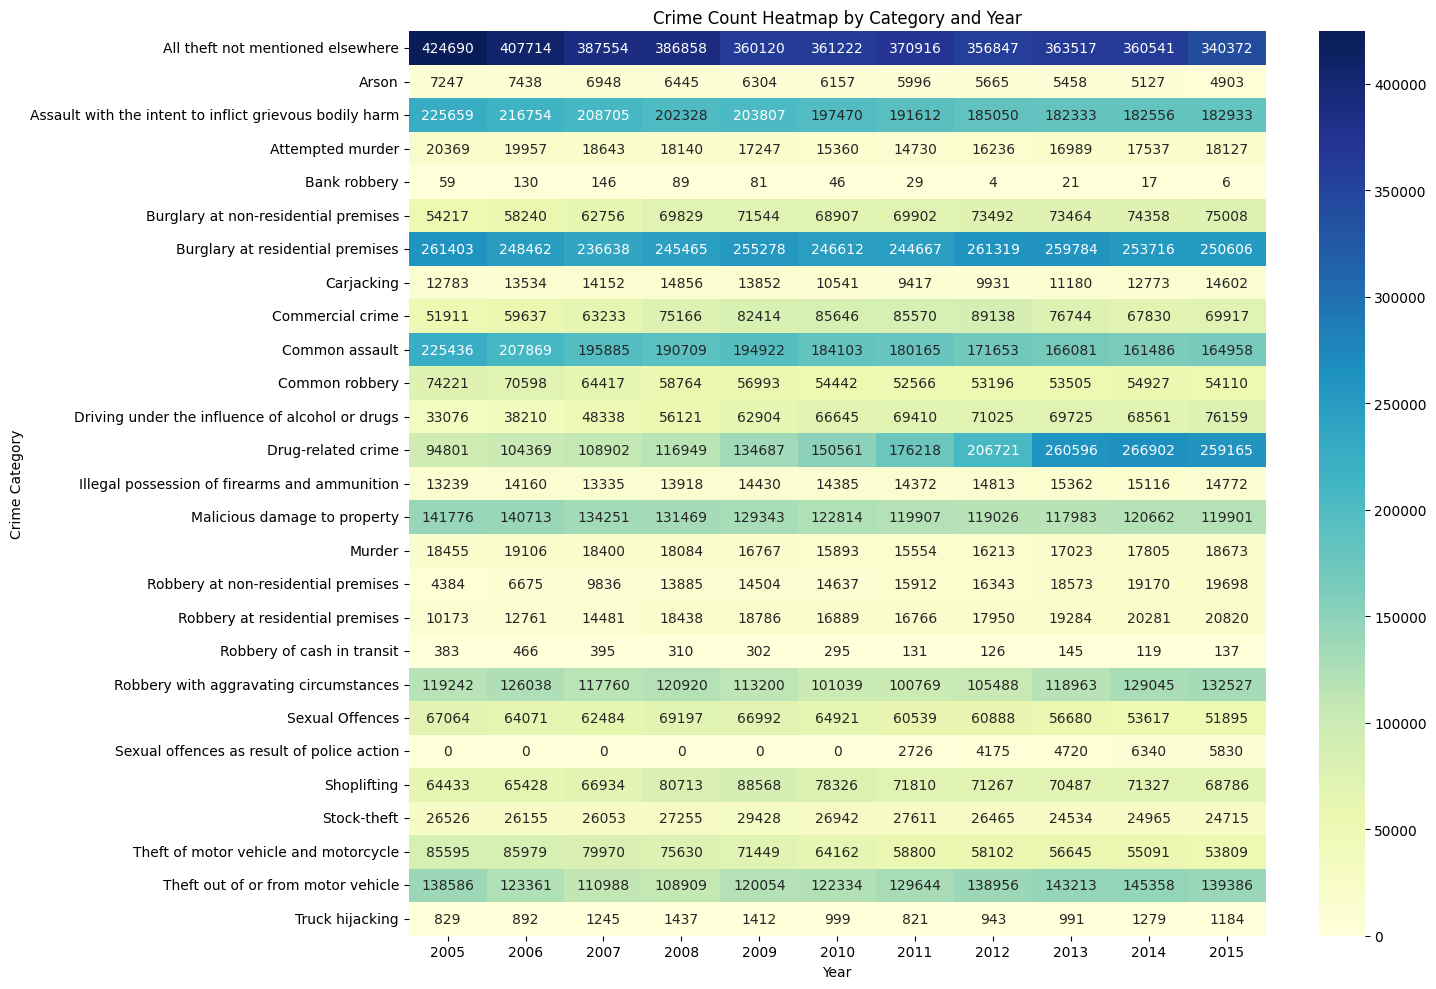

In [44]:
# Pivot the aggregated data to create a matrix for the heatmap
df_pivot = df_agg.pivot(index='Category', columns='Year', values='Crime_Count')

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt='d') # Set annot=True to display numbers, fmt='d' for integer format
plt.title('Crime Count Heatmap by Category and Year')
plt.xlabel('Year')
plt.ylabel('Crime Category')
plt.tight_layout()
plt.show()


Select features and target, perform one-hot encoding on the target variable, and split the data into training and testing sets.



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = df.drop(['Province', 'Station', 'Category'], axis=1)
y = df['Category']

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (24688, 11)
Shape of X_test: (6173, 11)
Shape of y_train: (24688, 27)
Shape of y_test: (6173, 27)



Choose an appropriate classification model for the task.



Identify a suitable classification algorithm that can handle multi-class classification with potentially imbalanced classes. RandomForestClassifier is a good choice for this type of problem.



In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


Train the selected classification model using the training data.


**Reasoning**:
Train the initialized RandomForestClassifier model using the training features and the encoded training target variable.



In [24]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)


Evaluate the performance of the trained classification model using the testing data by making predictions, converting labels back, calculating accuracy, generating a classification report, and displaying a confusion matrix.



Accuracy: 0.0334

Classification Report:
                                                         precision    recall  f1-score   support

                      All theft not mentioned elsewhere       0.00      0.00      0.00       233
                                                  Arson       0.03      1.00      0.06       205
Assault with the intent to inflict grievous bodily harm       0.00      0.00      0.00       208
                                       Attempted murder       0.00      0.00      0.00       221
                                           Bank robbery       1.00      0.00      0.01       224
                   Burglary at non-residential premises       0.00      0.00      0.00       238
                       Burglary at residential premises       0.00      0.00      0.00       233
                                             Carjacking       0.00      0.00      0.00       226
                                       Commercial crime       0.00      0.00      0.0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


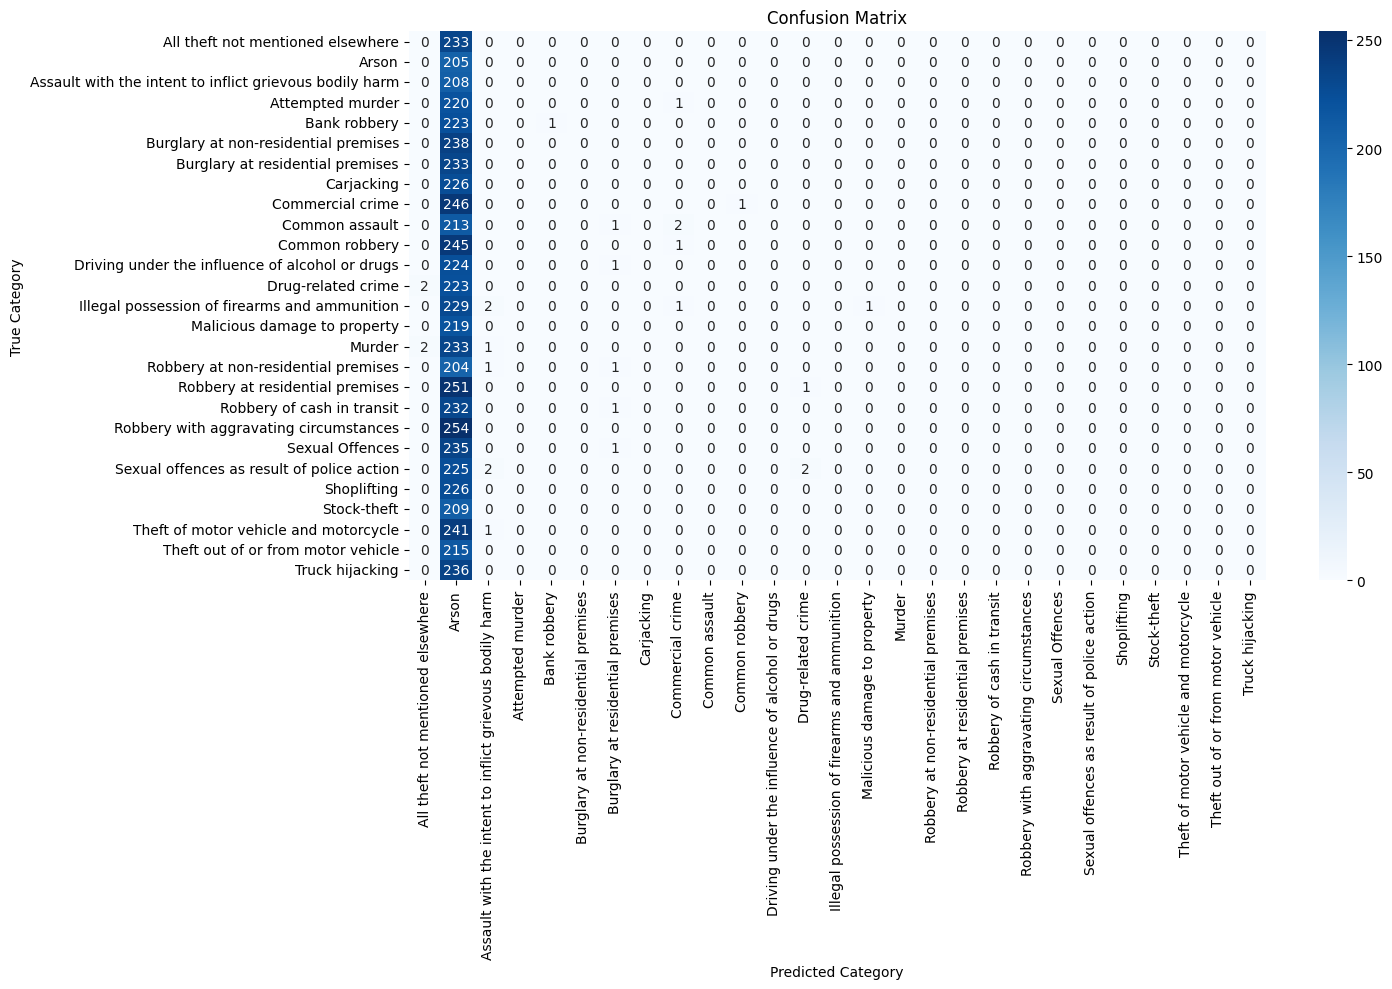

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Use predict_proba to get probability estimates
y_pred_proba = model.predict_proba(X_test)

# Determine the predicted class for each sample by finding the index of the highest probability
y_pred_indices = [np.argmax(proba_array) for proba_array in y_pred_proba]

# Convert the predicted indices back to one-hot encoded format
y_pred_encoded = np.zeros_like(y_test)
y_pred_encoded[np.arange(len(y_pred_indices)), y_pred_indices] = 1

# Handle cases where y_pred_encoded rows are all zeros
all_zero_rows = np.where(~y_pred_encoded.any(axis=1))[0]
if len(all_zero_rows) > 0:
    # Find the index of the most frequent class in the training data's original labels
    most_frequent_class_index = np.argmax(np.bincount(np.argmax(y_train, axis=1)))
    # Replace the all-zero rows with the one-hot encoding of the most frequent class
    y_pred_encoded[all_zero_rows, most_frequent_class_index] = 1


y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Accuracy: 0.0334

Classification Report:
                                                         precision    recall  f1-score   support

                      All theft not mentioned elsewhere       0.00      0.00      0.00       233
                                                  Arson       0.03      1.00      0.06       205
Assault with the intent to inflict grievous bodily harm       0.00      0.00      0.00       208
                                       Attempted murder       0.00      0.00      0.00       221
                                           Bank robbery       1.00      0.00      0.01       224
                   Burglary at non-residential premises       0.00      0.00      0.00       238
                       Burglary at residential premises       0.00      0.00      0.00       233
                                             Carjacking       0.00      0.00      0.00       226
                                       Commercial crime       0.00      0.00      0.0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


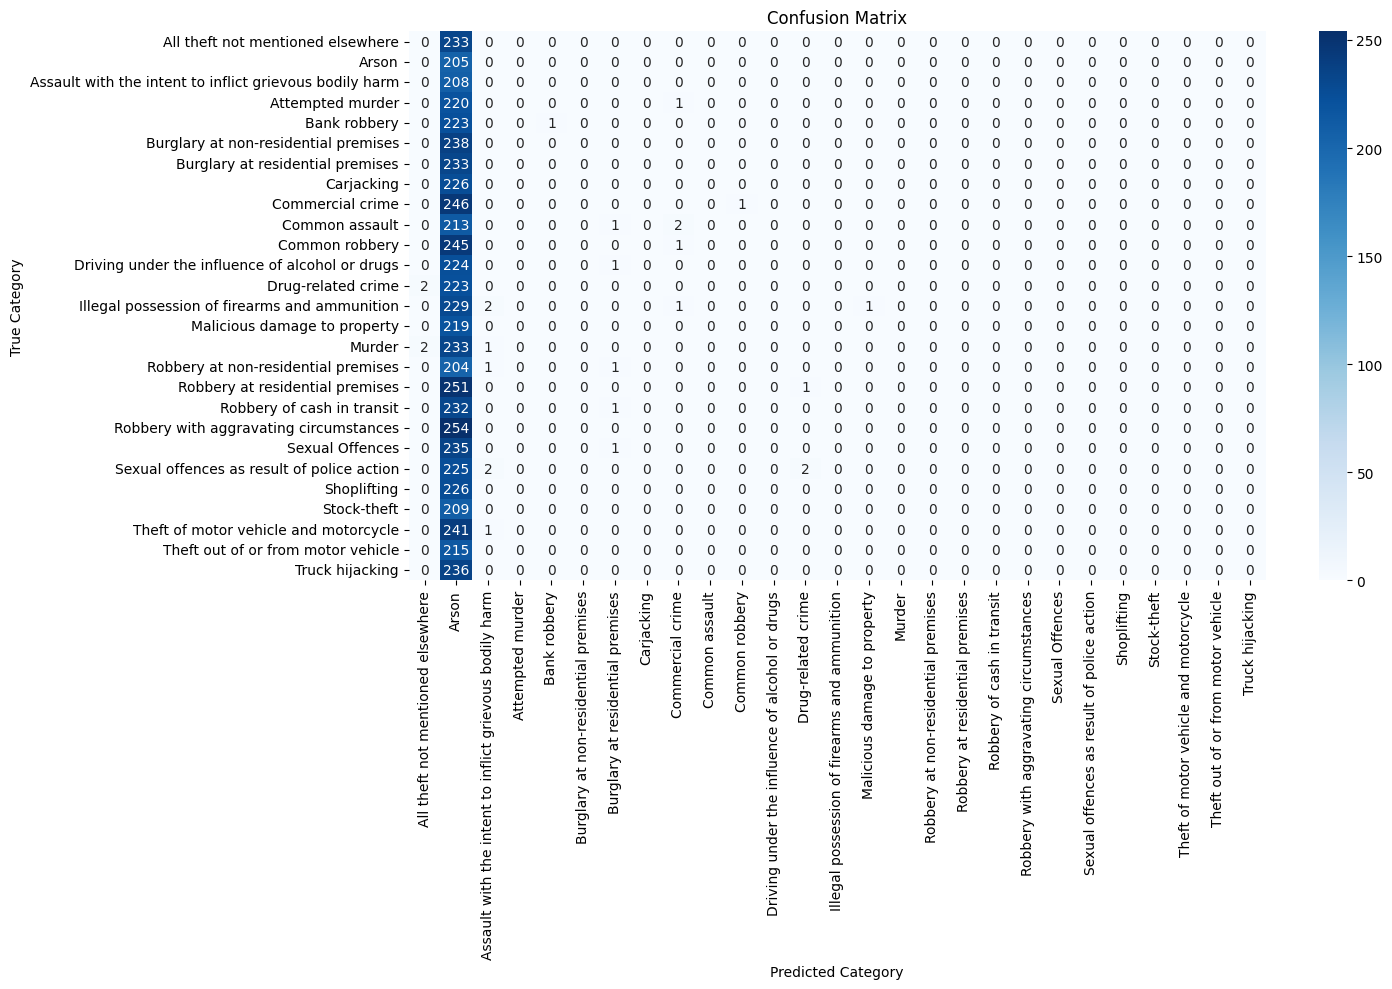

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Use predict_proba to get probability estimates
y_pred_proba = model.predict_proba(X_test)

# Determine the predicted class for each sample by finding the index of the highest probability
y_pred_indices = [np.argmax(proba_array) for proba_array in y_pred_proba]

# Convert the predicted indices back to one-hot encoded format
y_pred_encoded = np.zeros_like(y_test)
y_pred_encoded[np.arange(len(y_pred_indices)), y_pred_indices] = 1

# Handle cases where y_pred_encoded rows are all zeros
all_zero_rows = np.where(~y_pred_encoded.any(axis=1))[0]
if len(all_zero_rows) > 0:
    # Find the index of the most frequent class in the training data's original labels
    most_frequent_class_index = np.argmax(np.bincount(np.argmax(y_train, axis=1)))
    # Replace the all-zero rows with the one-hot encoding of the most frequent class
    y_pred_encoded[all_zero_rows, most_frequent_class_index] = 1

y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [41]:
print("The station with the most crimes is:")
display(most_crime_station)

The station with the most crimes is:


,654
Station,Mitchells Plain
Crime_Count,278498


Drone programming

i would Define the Grid Dimensions,the geographical boundaries of the area i want to simulate (e.g., Mitchells Plain).
I would then divide this area into a grid of cells. The size of each cell would depend on the desired resolution of your simulation. A smaller cell size provides more detail but increases computational complexity. I can represent this grid as a 2D array or matrix
 Use the crime data for the area (like the data I have for Mitchells Plain) to determine which grid cells have higher crime activity.I would need the geographical coordinates of the crime incidents or, if not available, approximate locations based on police station areas and then map these to my grid cells. For each grid cell, calculate a "hotspot score" or intensity based on the crime data within that cell. This could be a simple count of crimes, a weighted count (giving more recent or severe crimes higher weight), or a more sophisticated density estimation.
Based on the hotspot intensity scores, identify which grid cells are considered "hotspots." This could involve setting a threshold (cells with a score above a certain value are hotspots), or identifying the top N% of cells with the highest scores.i could represent these hotspots in my grid data structure by assigning a specific value or flag to the hotspot cells.
 In the drone simulation, the drone would use this grid with assigned hotspots to inform its behavior for example, spending more time patrolling hotspot cells, or responding to simulated events occurring within hotspots